In [95]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from pandas.io.parsers import read_csv
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle

Load the facial keypoints data. Assumes the data/ folder is populated with the training and test csvs (not included in the repo). In this case I am treating all the complete cases from training.csv as training data, and the incomplete as dev data. This won't be useful for gauging accuracy scores but we can print out a few examples with the points on them.

In [96]:
train = read_csv("data/training.csv")
test = read_csv("data/test.csv")
dev = train[train.isnull().any(axis=1)]

In [97]:
def process_data(full, labels=False):
    full['Image'] = full['Image'].apply(lambda im: np.fromstring(im, sep=' '))
    d = (np.vstack(full['Image'].values) / 255).astype(np.float32)
    if labels:
        l = full[full.columns[:-1]].values
        l = ((l-48)/48).astype(np.float32)
        return d,l
    else:
        return d

# Start with only the complete cases
train = train.dropna()
# Retain the column headers for later lookout of particular points
train_label_cols = train[train.columns[:-1]].columns

# Process training, test and dev data
train_data,train_labels = process_data(train, True)
test_data = process_data(test)
dev_data,dev_labels = process_data(dev, True)

Plot a face with keypoints marked:

In [98]:
def plot_face(face, points=None):
    # Assumes not yet shaped
    img = face.reshape(96,96)
    plt.imshow(img, cmap='gray')
    if points is not None:
        plt.scatter(points[0::2]*48+48, points[1::2]*48+48, marker='x', s=10)
    plt.show()

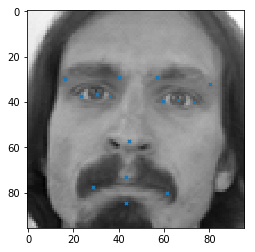

In [99]:
plot_face(train_data[0], train_labels[0])

Extract just the nose keypoint and plot that.

In [100]:
print(train_label_cols)

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')


In [44]:
nose_x_ind = np.where(train_label_cols == 'nose_tip_x')[0]
nose_y_ind = np.where(train_label_cols == 'nose_tip_y')[0]
print(nose_x_ind, nose_y_ind)
print(train_labels[0][nose_x_ind], train_labels[0][nose_y_ind])

[20] [21]
[-0.07457143] [ 0.18889172]


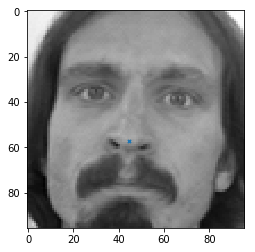

In [101]:
plot_face(train_data[0], np.array([train_labels[0][nose_x_ind], train_labels[0][nose_y_ind]]))

Build a linear regression model for all the points of the complete cases.

In [102]:
lm = LinearRegression()
lm.fit(train_data, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Generate predictions based on the dev data (which, remember, is just the set of incomplete cases, ignoring the labels they do have). Output one example.

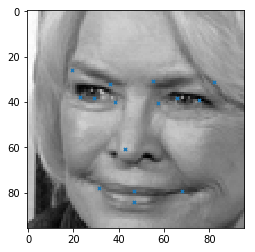

In [103]:
dev_pred = lm.predict(dev_data)
plot_face(dev_data[107], dev_pred[107])